# Análise de Sentimentos do Twitter

In [33]:
# Instalação das bibliotecas
#%pip install textblob
#%pip install nltk

In [34]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [35]:
# Baixa o lexicon do Vander
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\josaf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Carrega o dataset local
# Dataset: https://www.kaggle.com/datasets/goyaladi/twitter-dataset
df_tweets = pd.read_csv('../../datasets/twitter_dataset.csv')

In [37]:
df_tweets.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [38]:
# Limpeza e Preparação do Texto
def limpar_texto(text):
  # Remove URLs
  text = re.sub(r"http\S+|www\S+|https\S+", '',text,flags=re.MULTILINE)

  # Remove menções e hashtags
  text = re.sub(r"@\w+|#\w+",'',text)

  # Remove caracteres especiais
  text = re.sub(r"[^\w\s']", '',text)

  # Converter para minúsculas
  text = text.lower()

  #Remove espaços extras
  text = re.sub(r"\s+", ' ', text ).strip()
  return text

In [39]:
df_tweets['texto_limpo'] = df_tweets['Text'].apply(limpar_texto)

In [40]:
# Análise de Sentimento - VADER
sia = SentimentIntensityAnalyzer()

def analisar_sentimento_vader(text):
  scores = sia.polarity_scores(text)
  compound_score = scores['compound']
  if compound_score >= 0.05:
    return 'positivo'
  elif compound_score <= -0.05:
    return 'negativo'
  else:
    return 'neutro'

In [41]:
df_tweets['sentimento_vader'] = df_tweets['texto_limpo'].apply(analisar_sentimento_vader)

In [42]:
# Análise de Sentimento - TextBlob
def analisar_sentimento_textblob(text):
  analysis = TextBlob(text)
  polarity = analysis.sentiment.polarity
  if polarity > 0:
    return 'positivo'
  elif polarity < 0:
    return 'negativo'
  else:
    return 'neutro'

In [43]:
df_tweets['sentimento_textblob'] = df_tweets['texto_limpo'].apply(analisar_sentimento_textblob)

In [ ]:
# Comparando Resultados
df_tweets[['Text', 'sentimento_vader', 'sentimento_textblob']].head()

,Text,sentimento_vader,sentimento_textblob
0,Party least receive say or single. Prevent pre...,positivo,positivo
1,Hotel still Congress may member staff. Media d...,positivo,positivo
2,Nice be her debate industry that year. Film wh...,positivo,positivo
3,Laugh explain situation career occur serious. ...,positivo,positivo
4,Involve sense former often approach government...,positivo,positivo


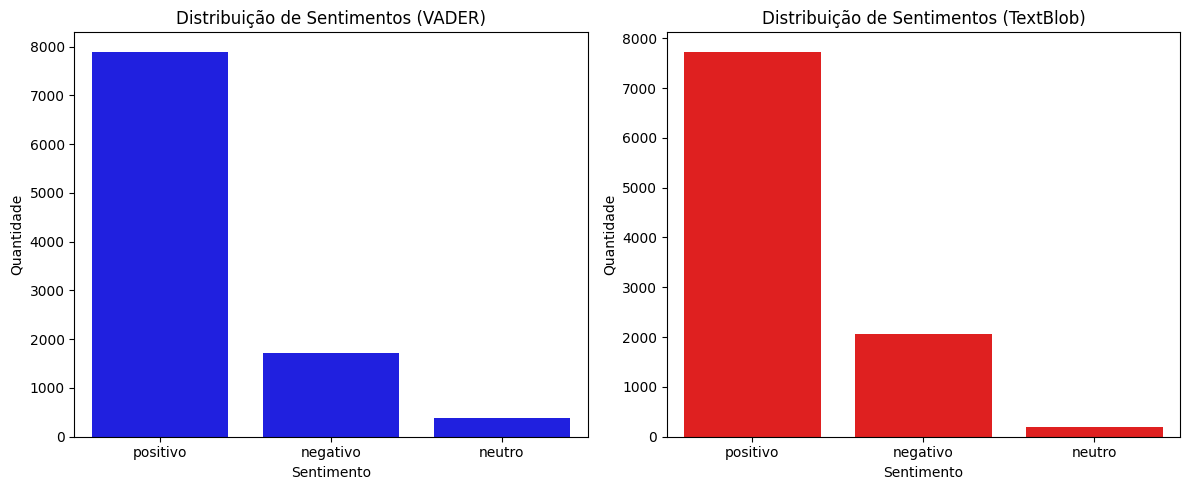

In [46]:
# Visualização

plt.figure(figsize=(12,5))

# Contagem do VADER
contagem_vader = df_tweets['sentimento_vader'].value_counts()

plt.subplot(1,2,1)
sns.barplot(x=contagem_vader.index, y=contagem_vader.values, color='blue')
plt.title('Distribuição de Sentimentos (VADER)')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')

# Contagem do TextBlob
contagem_textblob = df_tweets['sentimento_textblob'].value_counts()

plt.subplot(1,2,2)
sns.barplot(x=contagem_textblob.index, y=contagem_textblob.values, color='red')
plt.title('Distribuição de Sentimentos (TextBlob)')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')

plt.tight_layout()
plt.show()
